[Probability and Statistics for Data Science](https://www.ps4ds.net/) 

Code for Figure 4.11

Analysis of hourly precipitation data from 2015 in the United States at 134 weather stations, which shows that most precipitation patterns are never repeated, so it is impossible to learn the joint pmf from data without making independence or conditional independence assumptions\
Topics: Curse of dimensionality

Author: Carlos Fernandez-Granda\
Data source: https://www1.ncdc.noaa.gov/pub/data/uscrn/products/

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from os import listdir

font_size = 15

np.set_printoptions(precision=5)

def process_name(x):
    x = x[14:]
    x = x[:-7]
    x = x.translate(str.maketrans('','','_1234567890'))
    return x[2:] + ", " + x[:2]

file_name_2015 = "../data/precipitation_2015.npy"
data_matrix_2015 = np.load(file_name_2015)

In [19]:
# We encode each pattern as an integer, adding 2**i if there is precipitation at index i
def compute_precipitation_pattern(row,verbose):
    pattern = 0
    for index,precipitation in enumerate(row):
        if verbose:
            print(precipitation)
        if precipitation > 0:
            pattern += 2**index
            if verbose:
                print("pattern updated to: " + str(pattern))
    return pattern
compute_precipitation_pattern(data_matrix_2015[2,:],True)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
pattern updated to: 1048576
1.3
pattern updated to: 3145728
0.0
0.0
-9999.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.2
pattern updated to: 2305843009216839680
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.4
pattern updated to: 41538374868278623334086979850600448
0.7
pattern updated to: 124615124604835865390574921118121984
0.0
0.0
0.0
0.0
0.0
0.0
0.2
pattern updated to: 10758439090884162848621031403360878592
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


10758439090884162848621031403360878592

In [20]:
precipitation_patterns = np.zeros(data_matrix_2015.shape[0])
for ind in range(data_matrix_2015.shape[0]):
    precipitation_patterns[ind] = compute_precipitation_pattern(data_matrix_2015[ind,:],False)
unique,unique_counts = np.unique(precipitation_patterns,return_counts=True)
print(unique_counts[20:30])

[1 1 2 1 2 1 3 1 9 1]


[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  20  22  23  26  36  39  48  51  52  80  86 117 163]
[5483  425  137   59   32   19    8    5    4    5    4    6    1    2
    2    4    3    4    1    3    1    2    1    1    1    1    1    1
    1    2    1]
[88.99529  6.89823  2.22366  1.88281]


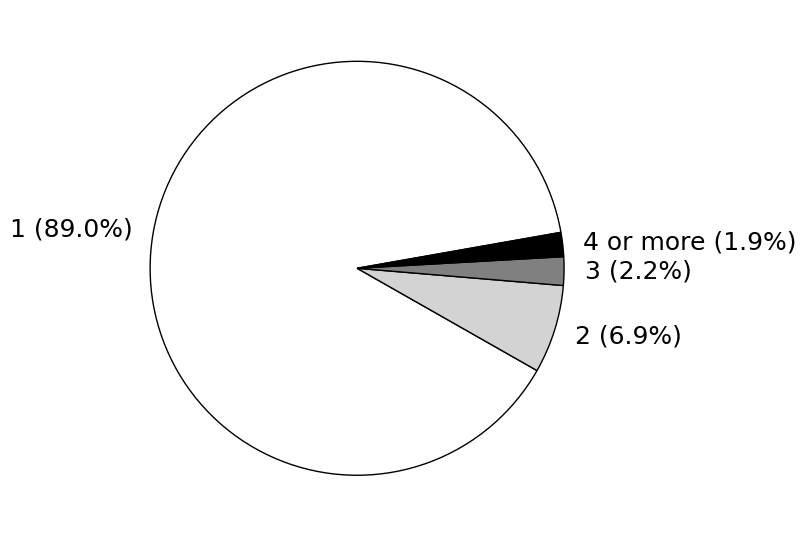

In [22]:
times_repeated,number_of_patterns = np.unique(unique_counts,return_counts=True)
print(times_repeated)
print(number_of_patterns)

number_of_patterns_plot = number_of_patterns[:4]
number_of_patterns_plot[3] = np.sum(number_of_patterns[4:])
percentages = 100 * number_of_patterns_plot / np.sum(number_of_patterns_plot)
print(percentages)
times_repeated_plot = ["1 (89.0%)","2 (6.9%)","3 (2.2%)","4 or more (1.9%)"]
font_size = 18
colors = ( "white", "lightgray", "gray",
          "black")
hatches = ['','o', 'x', '.']
plt.figure(figsize=(8,8))
patches = plt.pie(number_of_patterns_plot,labels=times_repeated_plot,textprops={'fontsize': font_size},
        startangle = 10,colors=colors,wedgeprops={"edgecolor":"k",'linewidth': 1,  'antialiased': True})
plt.tight_layout()